 Housing dataset which contains information about different houses in Boston.This dataset is available in scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [4]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression

# Load data into your workspace

In [5]:
df = pd.read_csv('H:/R_work/hou_all.csv')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,OUT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1


In [6]:
#print the columns
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV', 'OUT'],
      dtype='object')

# Our data
CRIM: Per capita crime rate by town
ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
INDUS: Proportion of non-retail business acres per town
CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX: Nitric oxide concentration (parts per 10 million)
RM: Average number of rooms per dwelling
AGE: Proportion of owner-occupied units built prior to 1940
DIS: Weighted distances to five Boston employment centers
RAD: Index of accessibility to radial highways
TAX: Full-value property tax rate per $ 10,000
PTRATIO: Pupil-teacher ratio by town
B: 1000(Bk — 0.63)^2, where Bk is the proportion of [people of African American descent] by town
LSTAT: Percentage of lower status of the population
MEDV: Median value of owner-occupied homes in $1000s

In [7]:
# total records and features 
df.shape

(506, 15)

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,OUT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.0
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806,1.0
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104,0.0
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.0
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000,1.0
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000,1.0
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.0


# Data Preprocessing: 
After uploading the data into your workspace , it is important to preprocess it, i.e handle missing values

In [9]:
#count the number of missing values for each feature
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
OUT        0
dtype: int64

Wow! we don't have any missing values

# Exploratory Data Analysis: 
After preprocessing we will visualize some of our features to analyze relationships among them.

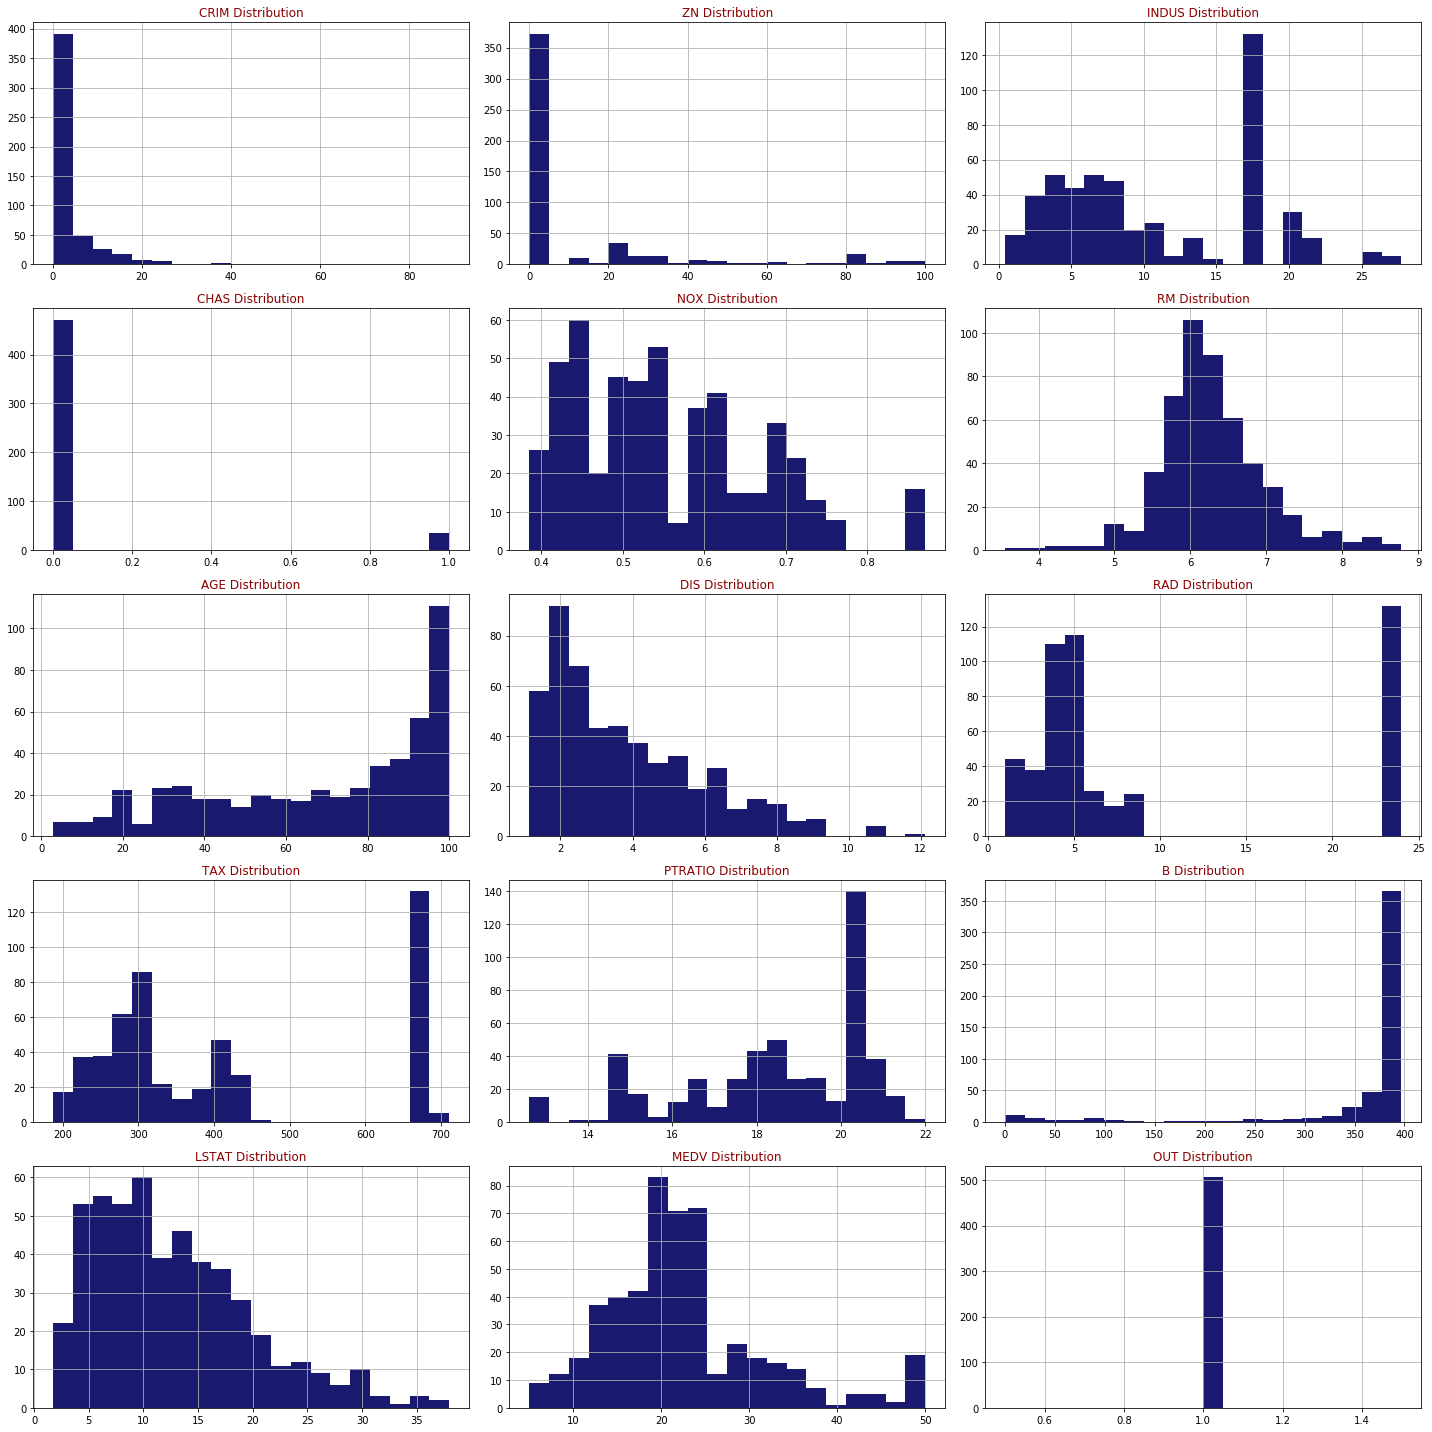

In [10]:
def draw_histograms(df, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,5,3)

We need to find the features that actually contribute in predicting MEDV because all the features are not necessary. we can use correlation matrix  that measures the linear relationships between the variables. A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used as a way to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

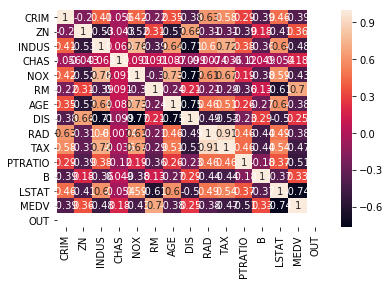

In [15]:
corr = df.corr()
sn.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)

From the correlogram above, we can clearly see that ZN,RM,DIS and B have positive correlation with MEDV so we will include these features in our training set

In [77]:
X= df[['ZN','RM','DIS','B']]
X.head(10)

,ZN,RM,DIS,B
0,18.0,6.575,4.0900,396.90
1,0.0,6.421,4.9671,396.90
2,0.0,7.185,4.9671,392.83
3,0.0,6.998,6.0622,394.63
4,0.0,7.147,6.0622,396.90
5,0.0,6.430,6.0622,394.12
6,12.5,6.012,5.5605,395.60
7,12.5,6.172,5.9505,396.90
8,12.5,5.631,6.0821,386.63
9,12.5,6.004,6.5921,386.71


In [78]:
Y= df['MEDV']
Y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

Text(0, 0.5, 'MEDV')

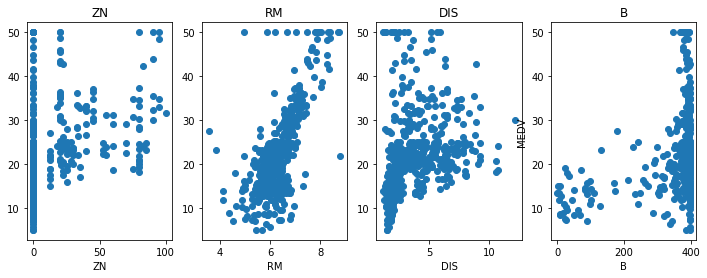

In [79]:
plt.figure(figsize=(12, 4))

predictors = ['ZN', 'RM','DIS','B']
target = df['MEDV']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
plt.ylabel('MEDV')

In [80]:
#Now, we can finally split the dataset into train and test sets.

In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

In [82]:
x_train.shape

(354, 4)

In [83]:
x_test.shape

(152, 4)

In [84]:
reg = LinearRegression()

In [85]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [90]:
y_pred = reg.predict(x_test)
from sklearn.metrics import r2_score

In [91]:
r2_score(y_test,y_pred)

0.6044393389584971